In [1]:
# Loading packages
import pandas as pd #Analysis 
import matplotlib.pyplot as plt #Visulization
import seaborn as sns #Visulization
import numpy as np #Analysis 
from scipy.stats import norm #Analysis 
from sklearn.preprocessing import StandardScaler #Analysis 
from scipy import stats #Analysis 
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [2]:
df_pa = pd.read_csv('VMI_Data_PA_V02_AK6.csv')
df_bp1 = pd.read_csv('VMI_Data_BP1_V02_AK6.csv')
df_bp2 = pd.read_csv('VMI_Data_BP2_V02_AK6.csv')

In [4]:
print("df_pa shape: ", df_pa.shape)
print("df_bp1 shape: ", df_bp1.shape)
print("df_bp2 shape: ", df_bp2.shape)

df_pa shape:  (123937, 32)
df_bp1 shape:  (123932, 32)
df_bp2 shape:  (123934, 32)


In [5]:
df_pa.head

<bound method NDFrame.head of        MACHINE_ID DATE_TIME_STAMP GT_BARCODE TIRE_TYPE  CUT_LENGTH  \
0             V02         05:28.5    AK6T27O       AK6    1709.019   
1             V02         10:44.0    AK6T27P       AK6    1709.061   
2             V02         13:30.9    AK6T27Q       AK6    1709.131   
3             V02         14:31.7    AK6T27R       AK6    1708.687   
4             V02         16:52.6    AK6T27S       AK6    1708.419   
5             V02         17:54.5    AK6T27T       AK6    1708.447   
6             V02         18:54.2    AK6T27U       AK6    1709.106   
7             V02         19:52.6    AK6T27V       AK6    1708.718   
8             V02         28:40.5    AK6T27W       AK6    1709.039   
9             V02         29:40.4    AK6T27X       AK6    1709.151   
10            V02         30:55.2    AK6T27Y       AK6    1708.513   
11            V02         54:41.7    AK6T27Z       AK6    1708.709   
12            V02         56:50.0    AK6T280       AK6    17

In [6]:
df_pa['MACHINE_ID'].describe()

count     123937
unique         1
top          V02
freq      123937
Name: MACHINE_ID, dtype: object

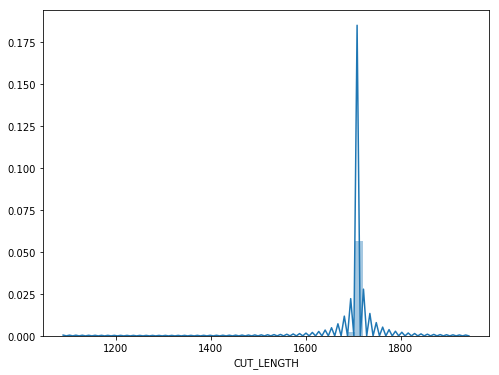

In [7]:
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_pa['CUT_LENGTH'])

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_pa['CUT_LENGTH'].skew())
print("Kurtosis: %f" % df_pa['CUT_LENGTH'].kurt())

Skewness: -72.268799
Kurtosis: 8045.072180


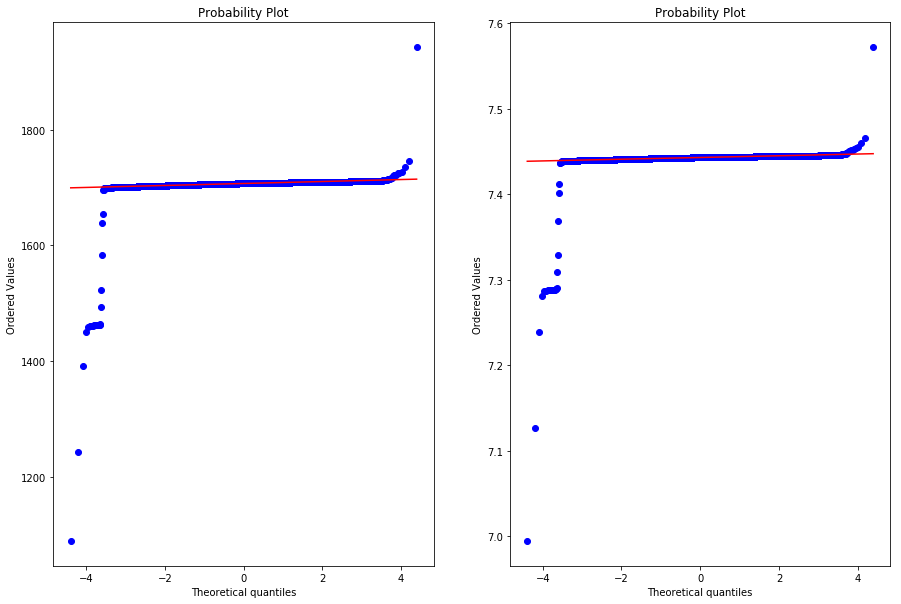

In [9]:
fig = plt.figure(figsize = (15,10))

fig.add_subplot(1,2,1)
res = stats.probplot(df_pa['CUT_LENGTH'], plot=plt)

fig.add_subplot(1,2,2)
res = stats.probplot(np.log1p(df_pa['CUT_LENGTH']), plot=plt)

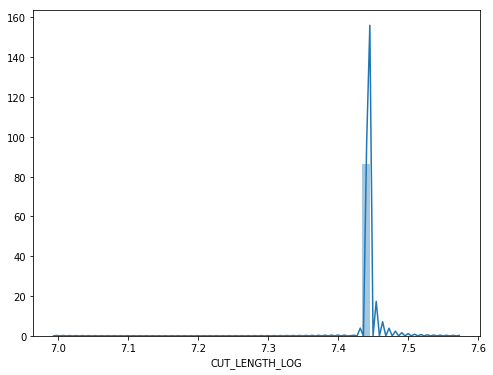

In [11]:
df_pa['CUT_LENGTH_LOG'] = np.log1p(df_pa['CUT_LENGTH'])
#histogram
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(df_pa['CUT_LENGTH_LOG'])

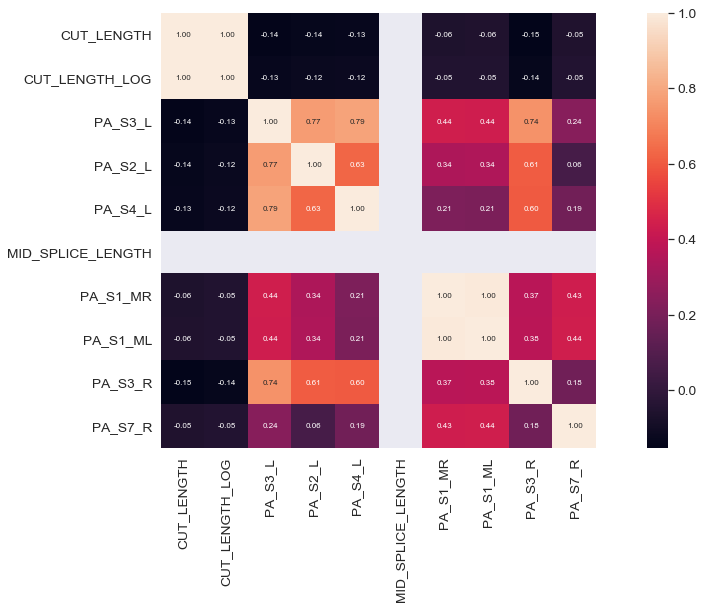

In [12]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
corrmat = abs(df_pa.corr(method='spearman')) # correlation
cols = corrmat.nlargest(k, 'CUT_LENGTH').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(df_pa[cols].values.T) # correlation
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(18, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


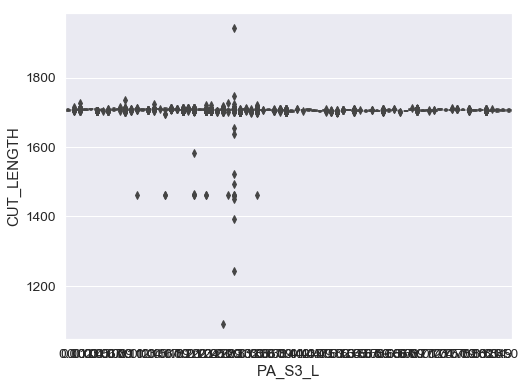

In [13]:
data = pd.concat([df_pa['CUT_LENGTH'], df_pa['PA_S3_L']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='PA_S3_L', y="CUT_LENGTH", data=data)

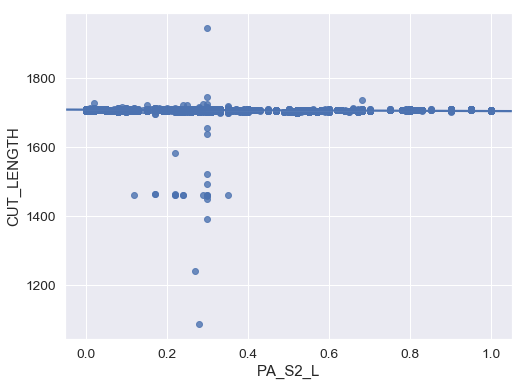

In [14]:
data = pd.concat([df_pa['CUT_LENGTH'], df_pa['PA_S2_L']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.regplot(x='PA_S2_L', y="CUT_LENGTH", data=data)